# 6.869 Miniplaces Challenge - Part 1

The miniplaces challenge is a 2 part challenge. Each part counts for 1 pset. 
In the challenge, you will work on classifying scenes into one of several categories (such as "desert", or "forest")

In this part, we'll use pretrained weights on a different dataset, but one that's also used for scene classification. We'll examine how we can visualize feature maps, to better understand how a neural net came to a decision about a particular scene.

Next week, you'll implement your own neural net to do scene classification, and try to improve it as much as you can.

# Requirements installation

First, let's install everything needed to run this notebook

In [2]:
from __future__ import print_function
!pip install Pillow==4.1.1
!pip install -U image
!pip install opencv-python


from io import BytesIO
from IPython.display import clear_output, Image, display
import numpy as np
import PIL.Image
import cv2

     |████████████████████████████████| 5.7MB 4.7MB/s 
ERROR: scikit-image 0.15.0 has requirement pillow>=4.3.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0


Requirement already up-to-date: image in /usr/local/lib/python3.6/dist-packages (1.5.27)


We will load PyTorch, our main tool to play with neural networks. 

In [3]:
!pip install torch
!pip install torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.hub

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag


# Loading Images and PyTorch models


Once, we have loaded all the relevant libraries, we will load the model. We will begin with an scene classification model trained on the Places Dataset with a ResNet-50 architecture.

![texto alternativo](https://www.codeproject.com/KB/AI/1248963/resnet.png)



In [0]:
resnet = models.resnet50(num_classes=365)
# print(resnet)

In [0]:
# Helper function to download things without wget
import requests
def download(url, fn=None):
  if fn is None:
    fn = url.split('/')[-1]
  r = requests.get(url)
  if r.status_code == 200:
      open(fn, 'wb').write(r.content)
      print("{} downloaded: {:.2f} KB".format(fn, len(r.content)/1024.))
  else:
      print("url not found:", url)

In [6]:
# Download the pretrained weights

download('http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar')



resnet50_places365.pth.tar downloaded: 94990.39 KB


We will load the pretrained weights into the model. 

In [7]:
sd = torch.load('resnet50_places365.pth.tar') # pytorch 1.1
sd = sd['state_dict']
# When a model is trained on the GPU, the weights begin with "module."
# Since we aren't going to be using the GPU, we'll manually change these keys to load the state dict
sd = {k.replace('module.', ''): v for k, v in sd.items()}
resnet.load_state_dict(sd)
resnet.eval()



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Visualizing Network Filters

First, we will define a function to display images from numpy arrays. 

In [0]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))



Now, we will focus on visualizing the filters of the ResNet network. Let's take a look to the first layer. 

In [9]:
print(resnet.conv1.weight.data.size()) # Access convolutional filters


torch.Size([64, 3, 7, 7])


Now, let's write a function to visualize the filters. You have to complete the following code, with one line normalizing the filter values:

In [0]:
def visualize_filters(conv_w,output_size = None):
    wmin, wmax = torch.min(conv_w), torch.max(conv_w)
    print(wmin, wmax)
    w_normalized = (conv_w-wmin)/(wmax-wmin)
    map_t = 255*w_normalized
    map_t = map_t.numpy()
    map_t = map_t.astype(np.uint8)
    if output_size is not None:
        map_t = cv2.resize(map_t,(output_size,output_size))
    return map_t
 


We will display the filters of the initial convolutional layer:

Visualizing conv1 filter 0
tensor(-0.3864) tensor(0.2272)


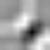

Visualizing conv1 filter 1
tensor(-0.2808) tensor(0.2280)


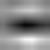

Visualizing conv1 filter 2
tensor(-0.4255) tensor(0.4087)


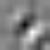

Visualizing conv1 filter 3
tensor(-0.2906) tensor(0.3927)


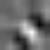

Visualizing conv1 filter 4
tensor(-0.2573) tensor(0.2658)


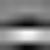

Visualizing conv1 filter 5
tensor(-0.3512) tensor(0.2674)


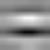

Visualizing conv1 filter 6
tensor(-0.0370) tensor(0.0872)


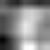

Visualizing conv1 filter 7
tensor(-0.2836) tensor(0.3681)


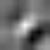

Visualizing conv1 filter 8
tensor(-0.1836) tensor(0.1868)


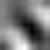

Visualizing conv1 filter 9
tensor(-0.1304) tensor(0.3293)


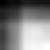

Visualizing conv1 filter 10
tensor(-0.0162) tensor(0.0796)


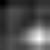

Visualizing conv1 filter 11
tensor(-0.1016) tensor(0.0509)


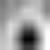

Visualizing conv1 filter 12
tensor(-0.0319) tensor(0.0848)


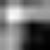

Visualizing conv1 filter 13
tensor(-0.4205) tensor(0.4031)


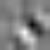

Visualizing conv1 filter 14
tensor(-0.2407) tensor(0.2374)


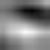

Visualizing conv1 filter 15
tensor(-0.2242) tensor(0.0965)


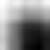

Visualizing conv1 filter 16
tensor(-0.0650) tensor(0.1230)


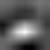

Visualizing conv1 filter 17
tensor(-0.0013) tensor(0.0040)


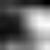

Visualizing conv1 filter 18
tensor(-0.0220) tensor(0.0367)


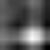

Visualizing conv1 filter 19
tensor(-0.0874) tensor(0.1354)


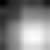

Visualizing conv1 filter 20
tensor(-0.0095) tensor(0.0504)


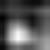

Visualizing conv1 filter 21
tensor(-0.1580) tensor(0.0495)


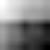

Visualizing conv1 filter 22
tensor(-0.3754) tensor(0.2758)


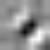

Visualizing conv1 filter 23
tensor(-0.1715) tensor(0.1510)


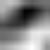

Visualizing conv1 filter 24
tensor(-0.3755) tensor(0.2770)


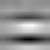

Visualizing conv1 filter 25
tensor(-0.0135) tensor(0.0159)


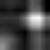

Visualizing conv1 filter 26
tensor(-0.0362) tensor(0.0480)


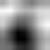

Visualizing conv1 filter 27
tensor(-0.2073) tensor(0.1897)


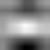

Visualizing conv1 filter 28
tensor(-0.1961) tensor(0.2241)


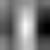

Visualizing conv1 filter 29
tensor(-0.4556) tensor(0.3448)


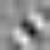

In [11]:
for i in range(30):
  print('Visualizing conv1 filter',i)
  vis = visualize_filters(resnet.conv1.weight.data[i,0,:,:],50)
  showarray(vis)


## Exercise: Visualize filters for another convolutional layer in ResNet

Visualizing conv2 filter 0
tensor(-0.0165) tensor(0.0035)


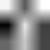

Visualizing conv2 filter 1
tensor(0.0050) tensor(0.0270)


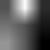

Visualizing conv2 filter 2
tensor(-0.0142) tensor(0.0126)


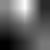

Visualizing conv2 filter 3
tensor(-0.0106) tensor(0.0116)


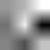

Visualizing conv2 filter 4
tensor(-0.0157) tensor(0.0118)


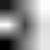

Visualizing conv2 filter 5
tensor(-0.0583) tensor(0.0143)


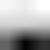

Visualizing conv2 filter 6
tensor(-0.0331) tensor(0.0461)


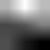

Visualizing conv2 filter 7
tensor(-0.0305) tensor(-0.0129)


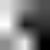

Visualizing conv2 filter 8
tensor(-0.0332) tensor(-0.0054)


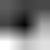

Visualizing conv2 filter 9
tensor(-0.0066) tensor(0.0215)


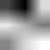

Visualizing conv2 filter 10
tensor(-0.0181) tensor(0.0163)


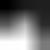

Visualizing conv2 filter 11
tensor(-0.0349) tensor(-0.0219)


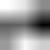

Visualizing conv2 filter 12
tensor(-0.0124) tensor(0.0245)


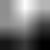

Visualizing conv2 filter 13
tensor(-0.0198) tensor(0.0160)


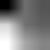

Visualizing conv2 filter 14
tensor(-0.0124) tensor(0.0097)


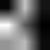

Visualizing conv2 filter 15
tensor(0.0022) tensor(0.0199)


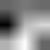

Visualizing conv2 filter 16
tensor(-0.0211) tensor(0.0186)


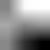

Visualizing conv2 filter 17
tensor(-0.0412) tensor(0.0034)


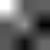

Visualizing conv2 filter 18
tensor(-0.0063) tensor(0.0088)


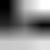

Visualizing conv2 filter 19
tensor(-0.0132) tensor(0.0122)


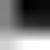

Visualizing conv2 filter 20
tensor(-0.0198) tensor(0.0382)


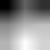

Visualizing conv2 filter 21
tensor(0.0048) tensor(0.0281)


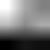

Visualizing conv2 filter 22
tensor(-0.0107) tensor(0.0776)


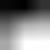

Visualizing conv2 filter 23
tensor(-0.0246) tensor(0.0067)


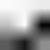

Visualizing conv2 filter 24
tensor(-0.0310) tensor(0.0027)


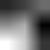

Visualizing conv2 filter 25
tensor(-0.0195) tensor(0.0082)


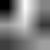

Visualizing conv2 filter 26
tensor(-0.0068) tensor(0.0182)


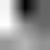

Visualizing conv2 filter 27
tensor(-0.0103) tensor(0.0152)


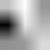

Visualizing conv2 filter 28
tensor(-0.0137) tensor(0.0188)


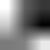

Visualizing conv2 filter 29
tensor(-0.0011) tensor(0.0169)


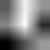

In [12]:
for i in range(30):
  print('Visualizing conv2 filter',i)
  vis_conv2 = visualize_filters(resnet.layer3[0].conv2.weight.data[i,0,:,:],50)
  showarray(vis_conv2)


# Predicting classes with a pre-trained model


To make the process easier to read, we will load the label <--> index assignament for the Places dataset. 

In [0]:
# Load labels
from urllib.request import urlopen

synset_url = 'http://gandissect.csail.mit.edu/models/categories_places365.txt'
classlabels = [r.split(' ')[0][3:] for r in urlopen(synset_url).read().decode('utf-8').split('\n')]


We will load one image to use through the pset. 

rio.jpg downloaded: 178.28 KB


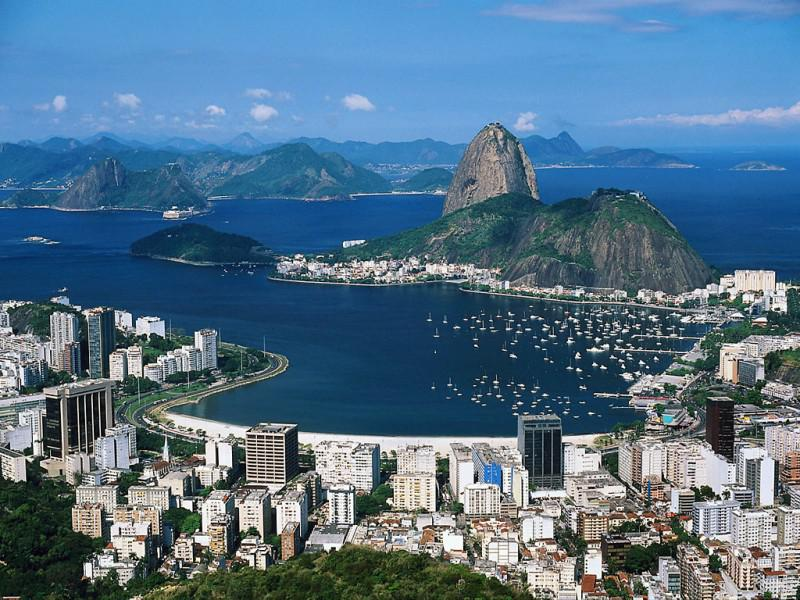

In [14]:
from torchvision import transforms


download('http://6.869.csail.mit.edu/fa19/miniplaces_part1/rio.jpg')
img0 = PIL.Image.open('rio.jpg').convert('RGB')
  
img_numpy = np.array(img0)


showarray(img_numpy)

First, let's take a look at the raw prediction of the model.

You can find the ImageNet classes here: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [15]:
  center_crop = transforms.Compose([
         transforms.Resize((227,227)),
         transforms.ToTensor(),
         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])

  im = center_crop(img0)
  out = resnet(im.unsqueeze(0)).squeeze()
  print(out.size())
  categories = out.topk(5)[1]

  print(categories)
  print(classlabels[categories[0]])
  print(classlabels[categories[1]])
  print(classlabels[categories[2]])
  print(classlabels[categories[3]])
  print(classlabels[categories[4]])



torch.Size([365])
tensor([348, 194,  49,  97, 171])
village
islet
beach_house
coast
harbor


# Visualizing Internal Activations of the Network

Let's look at what parts of the image cause different units to activate (send some positive signal). All of these activations combine to inform the final inference. 

The convolutional layers of ResNet essentially make a semantic representation of what is contained in the image. This is followed by two fully connected layers, which use the information from that representation to categorize the image.

So, let's remove the last few layers (which do classification) to get the underlying representation, and we'll visualize the activations that went into that representation from different units

In [0]:
def generate_featuremap_unit(resnet,unit_id,im_input):
    # Extract activation from model
    model_cut  = nn.Sequential(*list(resnet.children())[:-2]) # Removes last two layers of ResNet50
    # Mark the model as being used for inference
    model_cut.eval()
    # Crop the image
    im = center_crop(im_input)
    # Place the image into a batch of size 1, and use the model to get an intermediate representation
    out = model_cut(im.unsqueeze(0))
    # Print the shape of our representation
    print(out.size())
    # Extract the only result from this batch, and take just the `unit_id`th channel
    out_final = out.squeeze()[unit_id]
    # Return this channel
    return out_final
    

    

In [0]:
def visualize_featuremap(im_input,feature_map,alpha=0.3):
    # Normalize to [0..1], with a little leeway (0.9999) in case feature_map has 0 range
    feature_map = feature_map/(feature_map.max()+1e-10)
    # Convert to numpy (detach() just seperates a tensor from the gradient)
    feat_numpy = feature_map.detach().numpy()
    # Resize the feature map to our original image size (our strided conv layers reduce the size of the image)
    feat_numpy = cv2.resize(feat_numpy,(im_input.shape[1],im_input.shape[0]))
    # Invert to make the heatmap look more natural
    map_t = 1-feat_numpy
    # Add an extra dimension to make this a [H,W,C=1] image 
    feat_numpy = np.expand_dims(feat_numpy, axis=2)
    
    # Convert to image (UINT8 from 0-255)
    map_t = 255*map_t
    map_t = map_t.astype(np.uint8)
    # Use a color map to change this from BW to a nice color
    map_t = cv2.applyColorMap(map_t, cv2.COLORMAP_JET)
    # Combine the heatmap with the original image so you can see which section of the image is activated
    im_final = np.multiply((alpha*im_input + (1-alpha)*map_t), feat_numpy) + np.multiply(im_input, 1-feat_numpy)
    # Return final visualization
    return im_final


torch.Size([1, 2048, 8, 8])


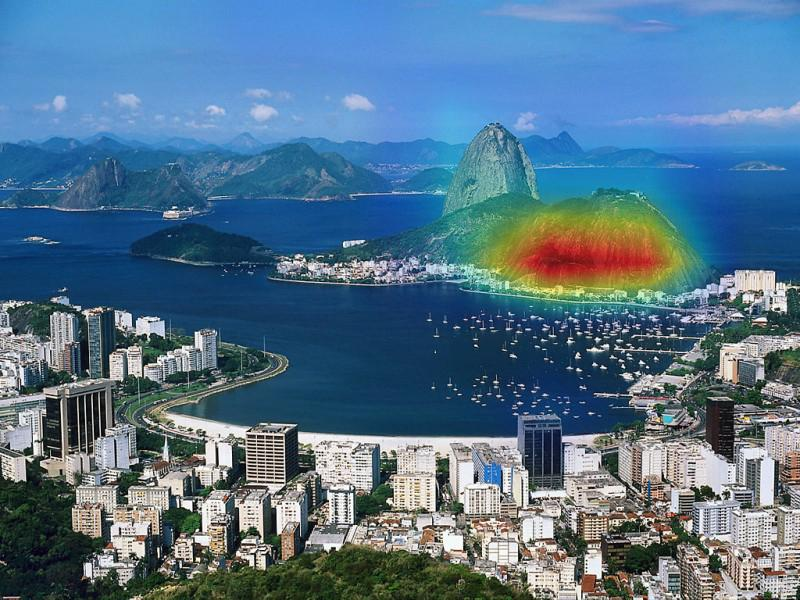

In [18]:
feat = generate_featuremap_unit(resnet,300,img0) # Detects mountains well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

Exercise: Find other units that detect other relevant concepts in the image. 




torch.Size([1, 2048, 8, 8])


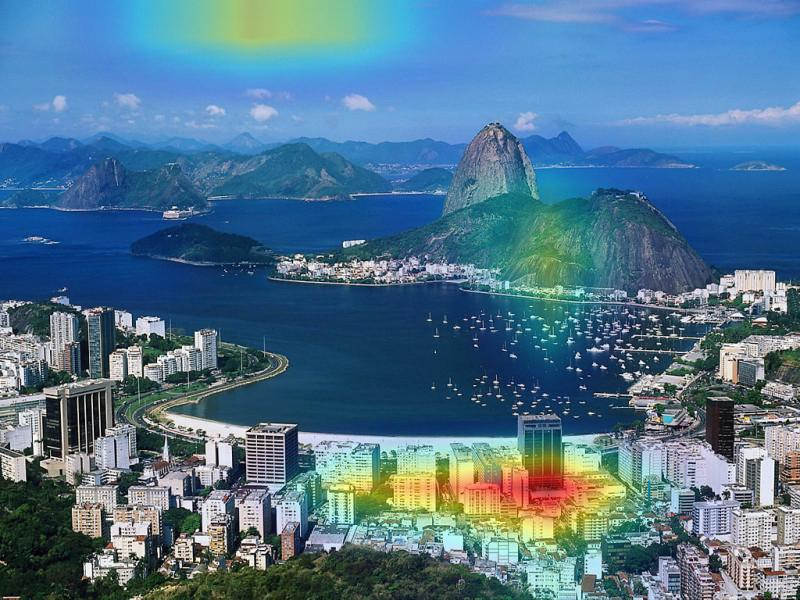

torch.Size([1, 2048, 8, 8])


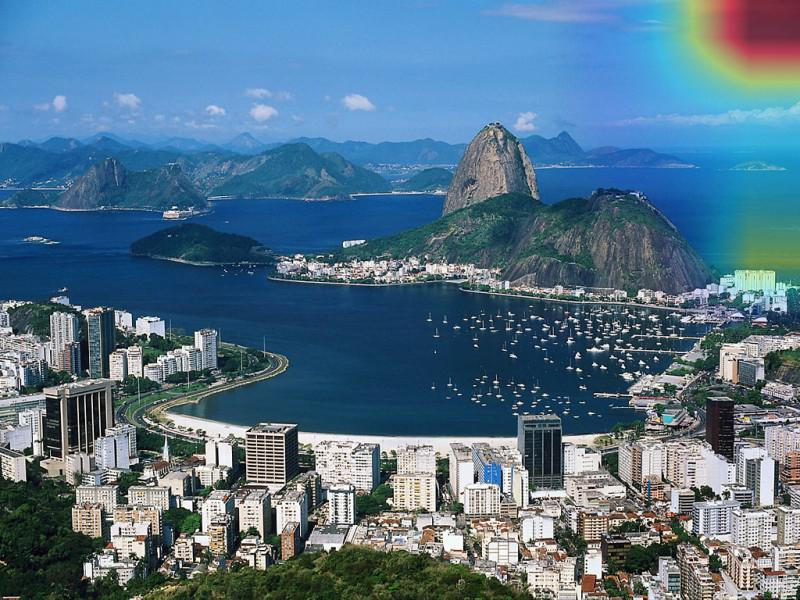

torch.Size([1, 2048, 8, 8])


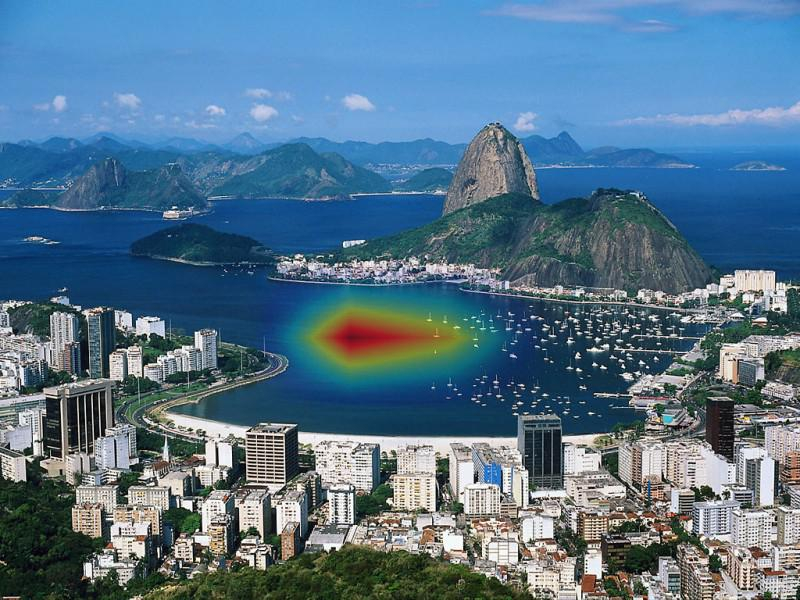

torch.Size([1, 2048, 8, 8])


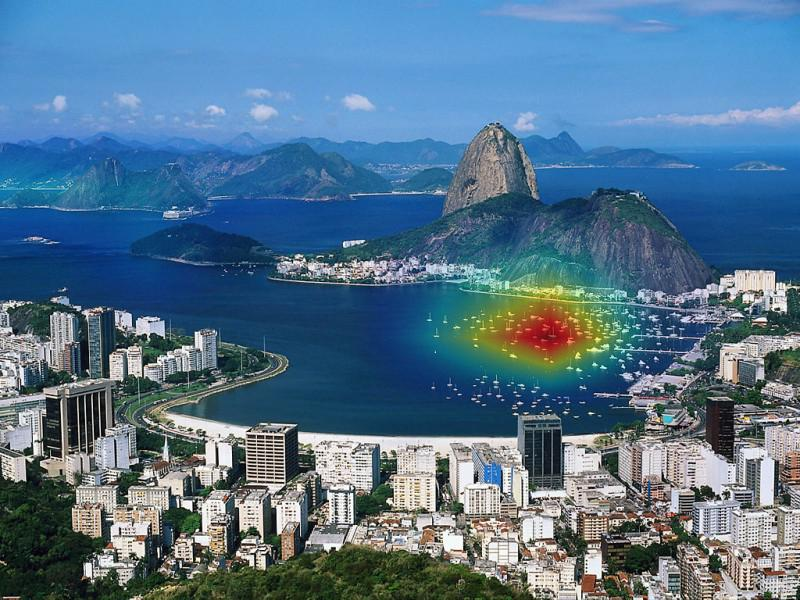

torch.Size([1, 2048, 8, 8])


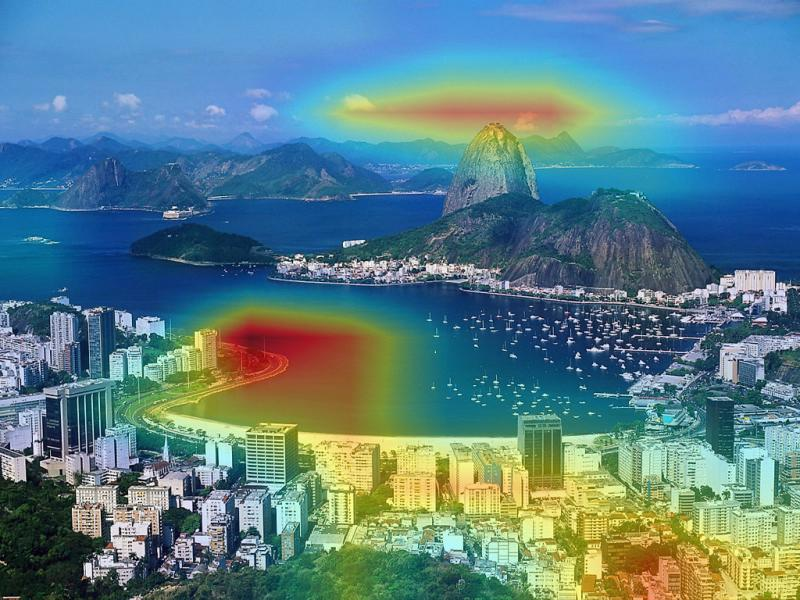

torch.Size([1, 2048, 8, 8])


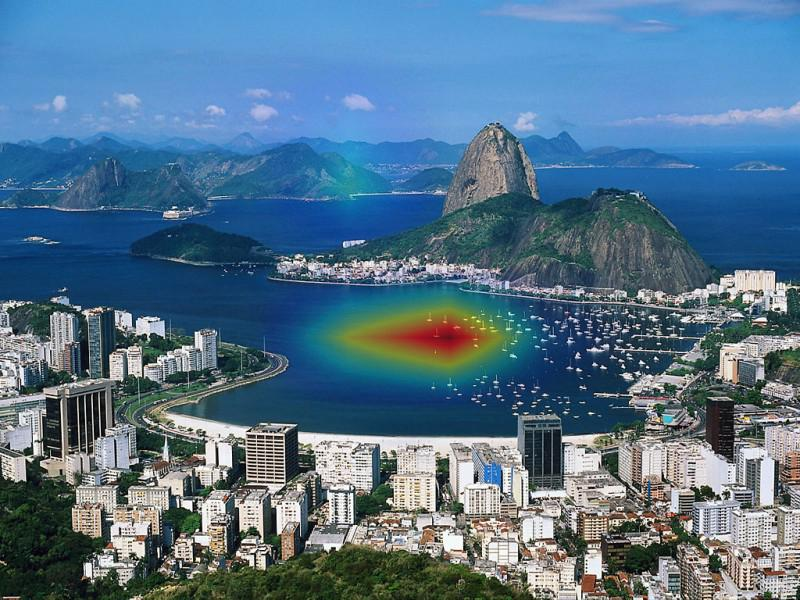

In [19]:
feat = generate_featuremap_unit(resnet,100,img0) # Detects village well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 77, img0) # Detects coast well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 34, img0) # Detects coast/harbor well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 175, img0) # Detects harbor well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 52, img0) # Detects sky/coast well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 128, img0) # Detects coast/harbor well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)


top 1 class id: 348
Original top 5 class names  ['village', 'islet', 'beach_house', 'coast', 'harbor']
Original top 5 class values  [8.457634  8.360574  7.7587166 6.94687   6.794323 ]
Modified top 5 class names  ['islet', 'village', 'beach_house', 'coast', 'harbor']
Modified top 5 class values  [8.058113  7.8164244 7.2781353 6.6502686 6.5385003]
torch.Size([1, 2048, 8, 8])


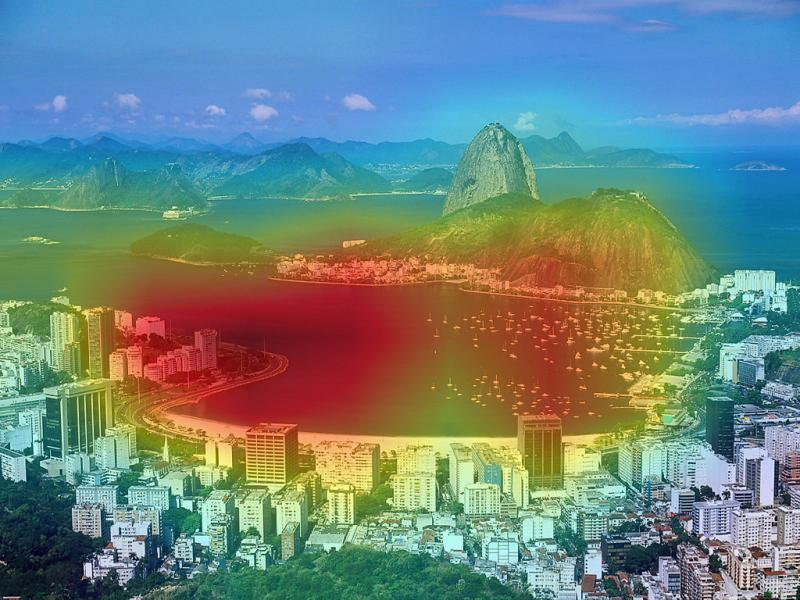

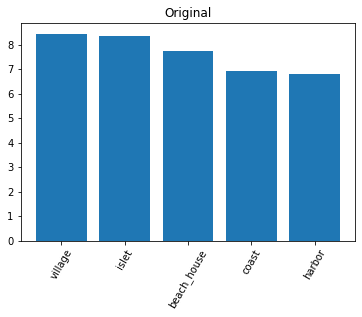

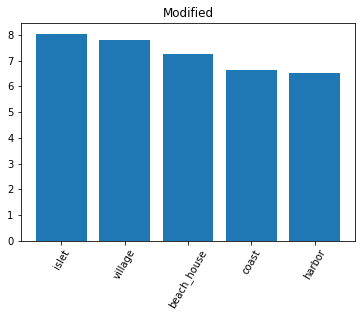

In [25]:
# (6.869 required) Find the unit index that has the maximum weights in the fully connected layer and deactivate that unit. Compare the orginal prediction and the new prediction
import matplotlib.pyplot as plt


out_original = resnet(im.unsqueeze(0)).squeeze() #origianl prediction 
sorted_classes = np.argsort(-out_original.data.cpu().numpy())
class_ids = sorted_classes[:5][0]
print("top 1 class id:", class_ids)
# Torch.max will help - returns (maxvalue,maxindex)
_, index = torch.max(resnet.fc.weight[class_ids,:], 0) #find the unit index that has the maximum weights in the fully connected layer 



# Remove the last 2 layers of resnet (the fully connected layers)
model_cut = nn.Sequential(*list(resnet.children())[:-2]) # Removes last two layers of ResNet50

# Get the representation for this model
out1 = model_cut(im.unsqueeze(0))
# Shape is now (1, # units, H, W)

# Set unit values to zero for unit with maximum weights
unit = out1[:,index,:,:] # Get maximum-weighted unit
unit = torch.zeros(unit.shape) # Make array of zeros of unit's size
out1[:,index,:,:] = unit # Set unit kernel to be all zeros

out2 = resnet.fc(resnet.avgpool(out1).squeeze().unsqueeze(0)).squeeze()

def plot_top_classes(values, top_k=5, title = None):
  sorted_classes = np.argsort(-values)
  class_ids = sorted_classes[:top_k]
  class_names = [classlabels[it] for it in list(class_ids)]
  class_values = values[class_ids]
  print(title + " top 5 class names ", class_names)
  print(title + " top 5 class values ", class_values)
  plt.bar(class_names, class_values)
  plt.xticks(rotation=60)
  plt.title(title)

plt.figure(0)
plot_top_classes(out.data.cpu().numpy(), title = 'Original')
plt.figure(1)
plot_top_classes(out2.data.cpu().numpy(), title = 'Modified')

# Now let's view the feature maps for this unit 
feat = generate_featuremap_unit(resnet, index, img0) 
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

# Visualizing model activations with Class Activation Models (CAMs)


Once we have load the image and the model, now we will explore how to visualize the internal activations of the model. We will start by visualizing which parts of the image are responsibe for the final decision. 

![texto alternativo](https://camo.githubusercontent.com/fb9a2d0813e5d530f49fa074c378cf83959346f7/687474703a2f2f636e6e6c6f63616c697a6174696f6e2e637361696c2e6d69742e6564752f6672616d65776f726b2e6a7067)



We create a version of the model without the last two layers, so that we can access the last convolutional layer.

In [0]:
#TODO: remove the last 2 layers of resnet 
model = nn.Sequential(*list(resnet.children())[:-2])
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


We compute the activations using the Class Activation Mapping for a given output label. 

In [0]:
def generate_featuremap_CAM(model,unit_id,im_input):
    #Extract activation from model
    
    im = center_crop(im_input)
    model.eval()
    out = model(im.unsqueeze(0)) #1 x 2048 x h x w
    w = out.size(3)
    h = out.size(2)
    b = out.size(0)
    c = out.size(1)
    print(out.size())
    # print(b,c,h,w)
    # fc input: N x 2048

    # View tensor size before
    print("Old tensor shape is: {}".format(out.shape))

    # Now reshape tensor and take transpose
    out = out.view(c,w*h)
    out = torch.t(out)

    # View tensor size before
    print("New tensor shape is: {}".format(out.shape))
    
    # Create "neural network" consisting only of fully connected layer and activation
    FC_layer = nn.Sequential(*list(resnet.children())[-1:])

    # Feed output averaged tensor into this "fully connected network"
    out_final = FC_layer(out)
    print(out_final.size())
    
    out_final = out_final.view(b,h*w,-1).transpose(1,2).view(b,-1,h,w)
    print(out_final.size())
    out_final = out_final.squeeze()[unit_id]
    # print(out_final.size())
    return out_final
    

    


We can visualize the most activated region in the image for the 5 main top classes. 

Visualizing category village
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


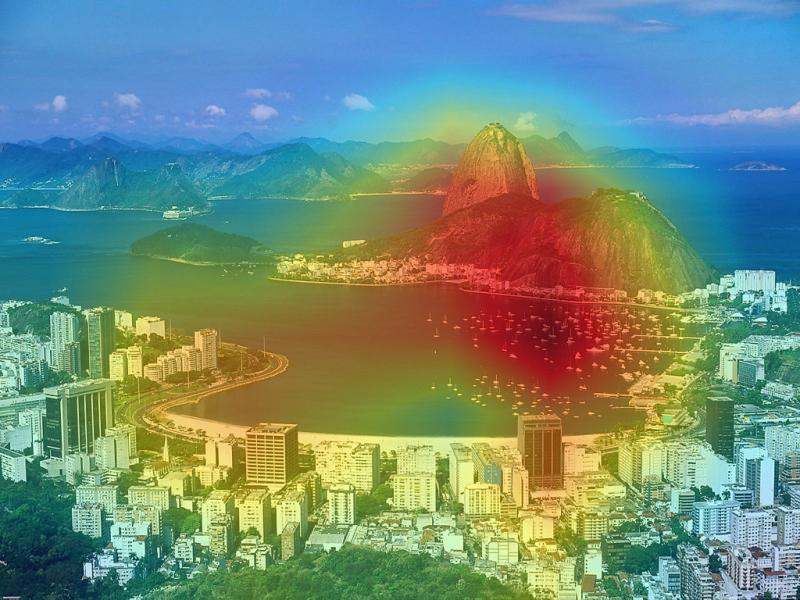

Visualizing category islet
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


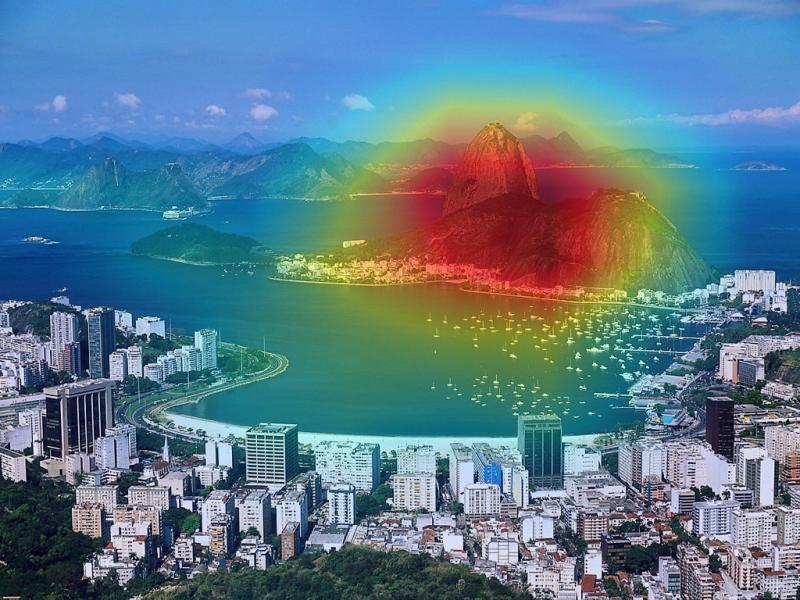

Visualizing category beach_house
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


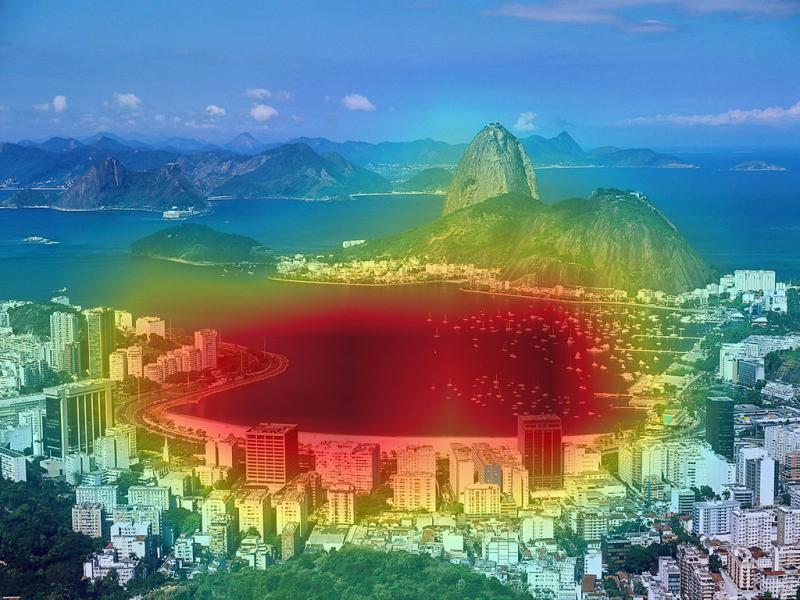

Visualizing category coast
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


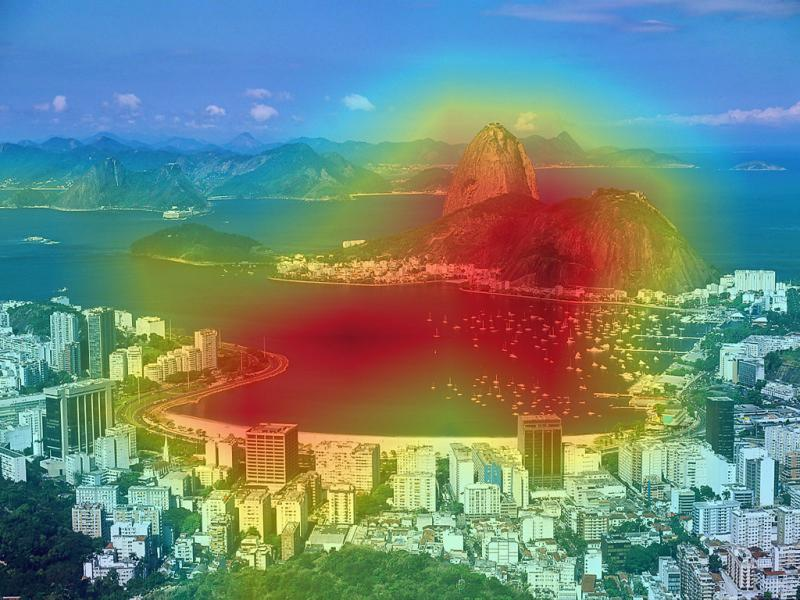

Visualizing category harbor
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


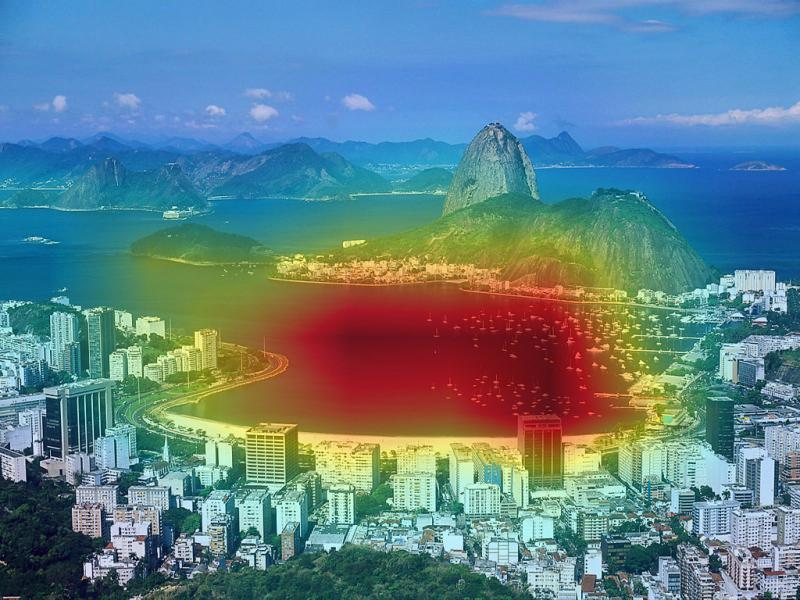

In [0]:
for i in range(categories.shape[0]):
  print('Visualizing category',classlabels[categories[i]])
  feat = generate_featuremap_CAM(model, categories[i].item(),img0)
  im_result = visualize_featuremap(img_numpy,feat)
  showarray(im_result)
